In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST); path, path.ls()

(Path('C:/Users/kevol/.fastai/data/mnist_png'),
 (#2) [Path('C:/Users/kevol/.fastai/data/mnist_png/testing'),Path('C:/Users/kevol/.fastai/data/mnist_png/training')])

In [3]:
items = get_image_files(path)
items[:10]

(#10) [Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/10.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1001.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1009.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/101.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1034.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1047.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1061.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1084.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1094.png'),Path('C:/Users/kevol/.fastai/data/mnist_png/testing/0/1121.png')]

<Axes: >

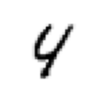

In [8]:
im = PILImageBW.create(items[4538])
im.show()

In [9]:
splitter = GrandparentSplitter(
    train_name="training",
    valid_name="testing",
)

In [10]:
splits = splitter(items)
splits[0][:5], splits[1][:5]

([10000, 10001, 10002, 10003, 10004], [0, 1, 2, 3, 4])

In [11]:
len(splits[0]), len(splits[1])

(60000, 10000)

In [12]:
dsrc = Datasets(
    items,
    tfms=[[PILImageBW.create], [parent_label, Categorize]],
    splits=splits
)

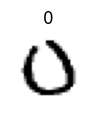

In [13]:
show_at(dsrc.train, 3);

In [14]:
item_tfms = [CropPad(34), RandomCrop(size=28), ToTensor()]

In [15]:
batch_tfms = [IntToFloatTensor(), Normalize()]

In [16]:
dls = dsrc.dataloaders(
    bs=128,
    after_item=item_tfms,
    after_batch=batch_tfms
)

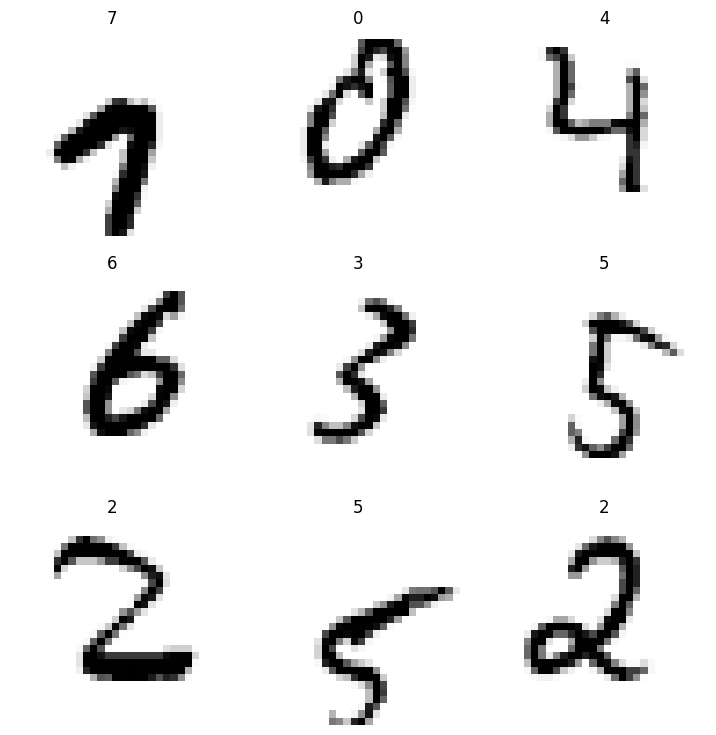

In [17]:
dls.show_batch()

In [19]:
model = resnet18( num_classes=dls.c).cuda()

model.fc

Linear(in_features=512, out_features=10, bias=True)

In [20]:
model.conv1 = nn.Conv2d(
    in_channels=1, 
    out_channels=64, 
    kernel_size=(7,7), 
    stride=(2,2), 
    padding=(3,3), 
    bias=False
)

In [21]:
model.cuda();

In [23]:
xb, yb = dls.one_batch()
model(xb)

TensorImageBW([[ 0.6846, -0.5807, -0.7389,  ..., -0.1244,  0.6727,  1.1186],
               [-1.0230,  1.1323, -0.0217,  ..., -0.8984, -0.5065,  1.0659],
               [-0.1264,  0.0341, -0.3271,  ...,  0.7238,  0.1922,  0.3607],
               ...,
               [-0.6970,  1.1727, -0.6230,  ..., -1.0523,  0.1544,  1.1498],
               [ 0.3620, -1.3267, -0.8340,  ...,  0.7673, -0.7382,  0.8586],
               [-0.7722, -0.4990, -0.0704,  ..., -0.0119,  0.1954,  0.8024]],
              device='cuda:0', grad_fn=<AliasBackward0>)

In [24]:
learn = Learner(dls, model, metrics=[accuracy])
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.109597,0.125458,0.959400,09:37
1,0.078275,0.130753,0.959300,03:02
